1. Dataset downloaded and saved to drive, and will be accessed in google colab by using mount drive
2.

In [1]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


3. Univariate

<Axes: >

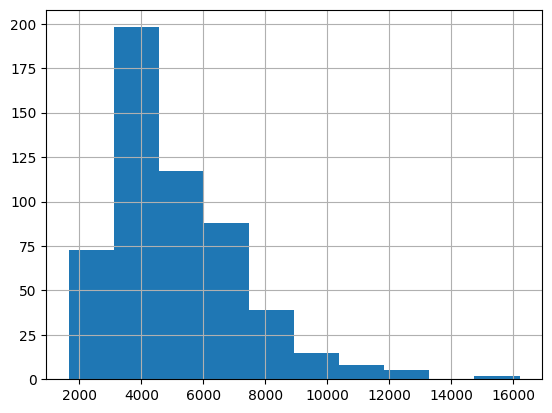

In [2]:
df['area'].hist()

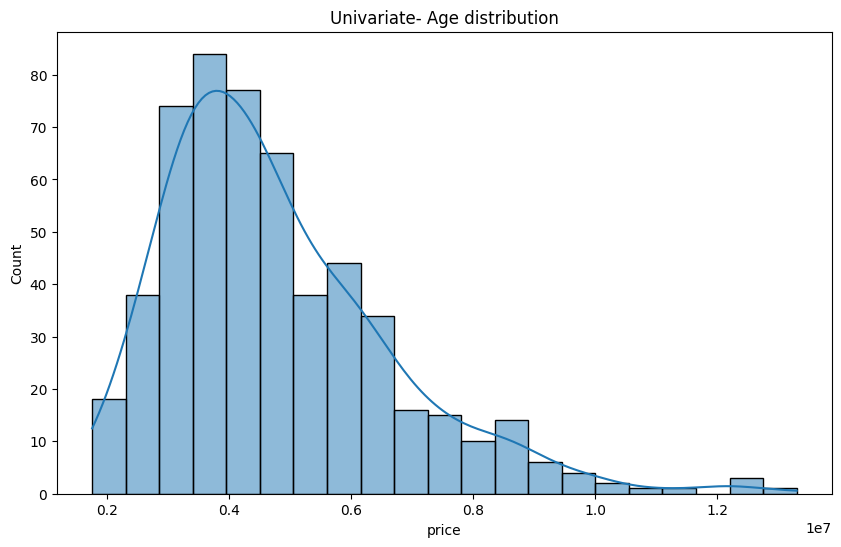

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', kde=True)
plt.title('Univariate- Age distribution')
plt.show()

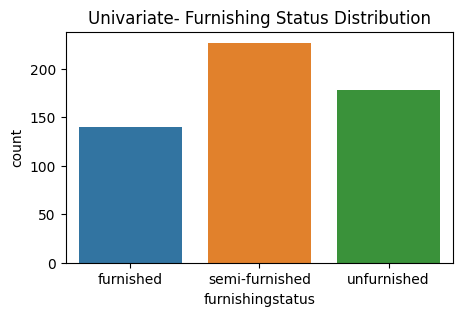

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='furnishingstatus')
plt.title('Univariate- Furnishing Status Distribution')
plt.show()

3. Bivariate

<Axes: xlabel='area', ylabel='price'>

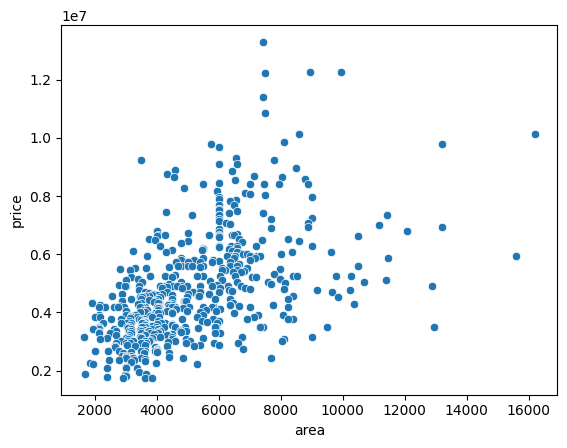

In [ ]:
import seaborn as sns
sns.scatterplot(x='area', y='price', data=df)

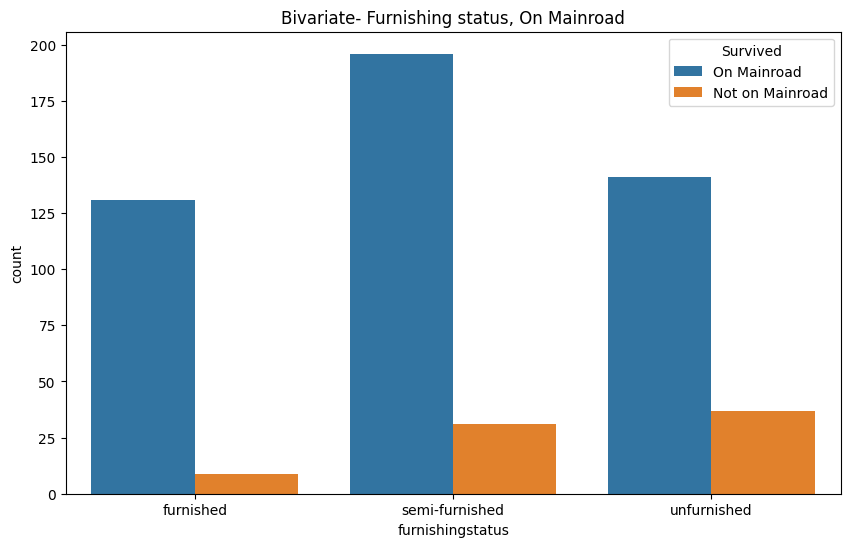

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='furnishingstatus', hue='mainroad')
plt.title('Bivariate- Furnishing status, On Mainroad')
plt.legend(title='Survived', loc='upper right', labels=['On Mainroad', 'Not on Mainroad'])
plt.show()

<Axes: xlabel='bedrooms', ylabel='price'>

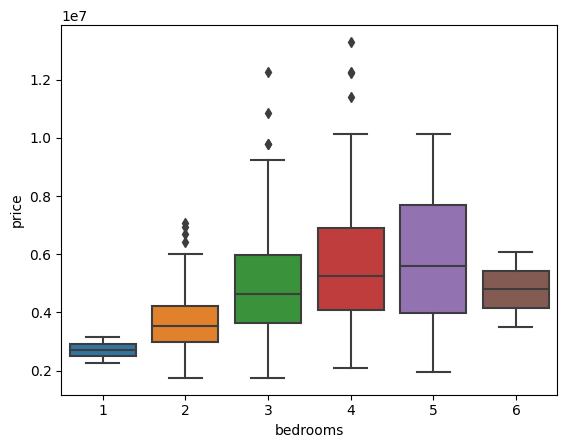

In [ ]:
sns.boxplot(x='bedrooms', y='price', data=df)

3. Multivariate

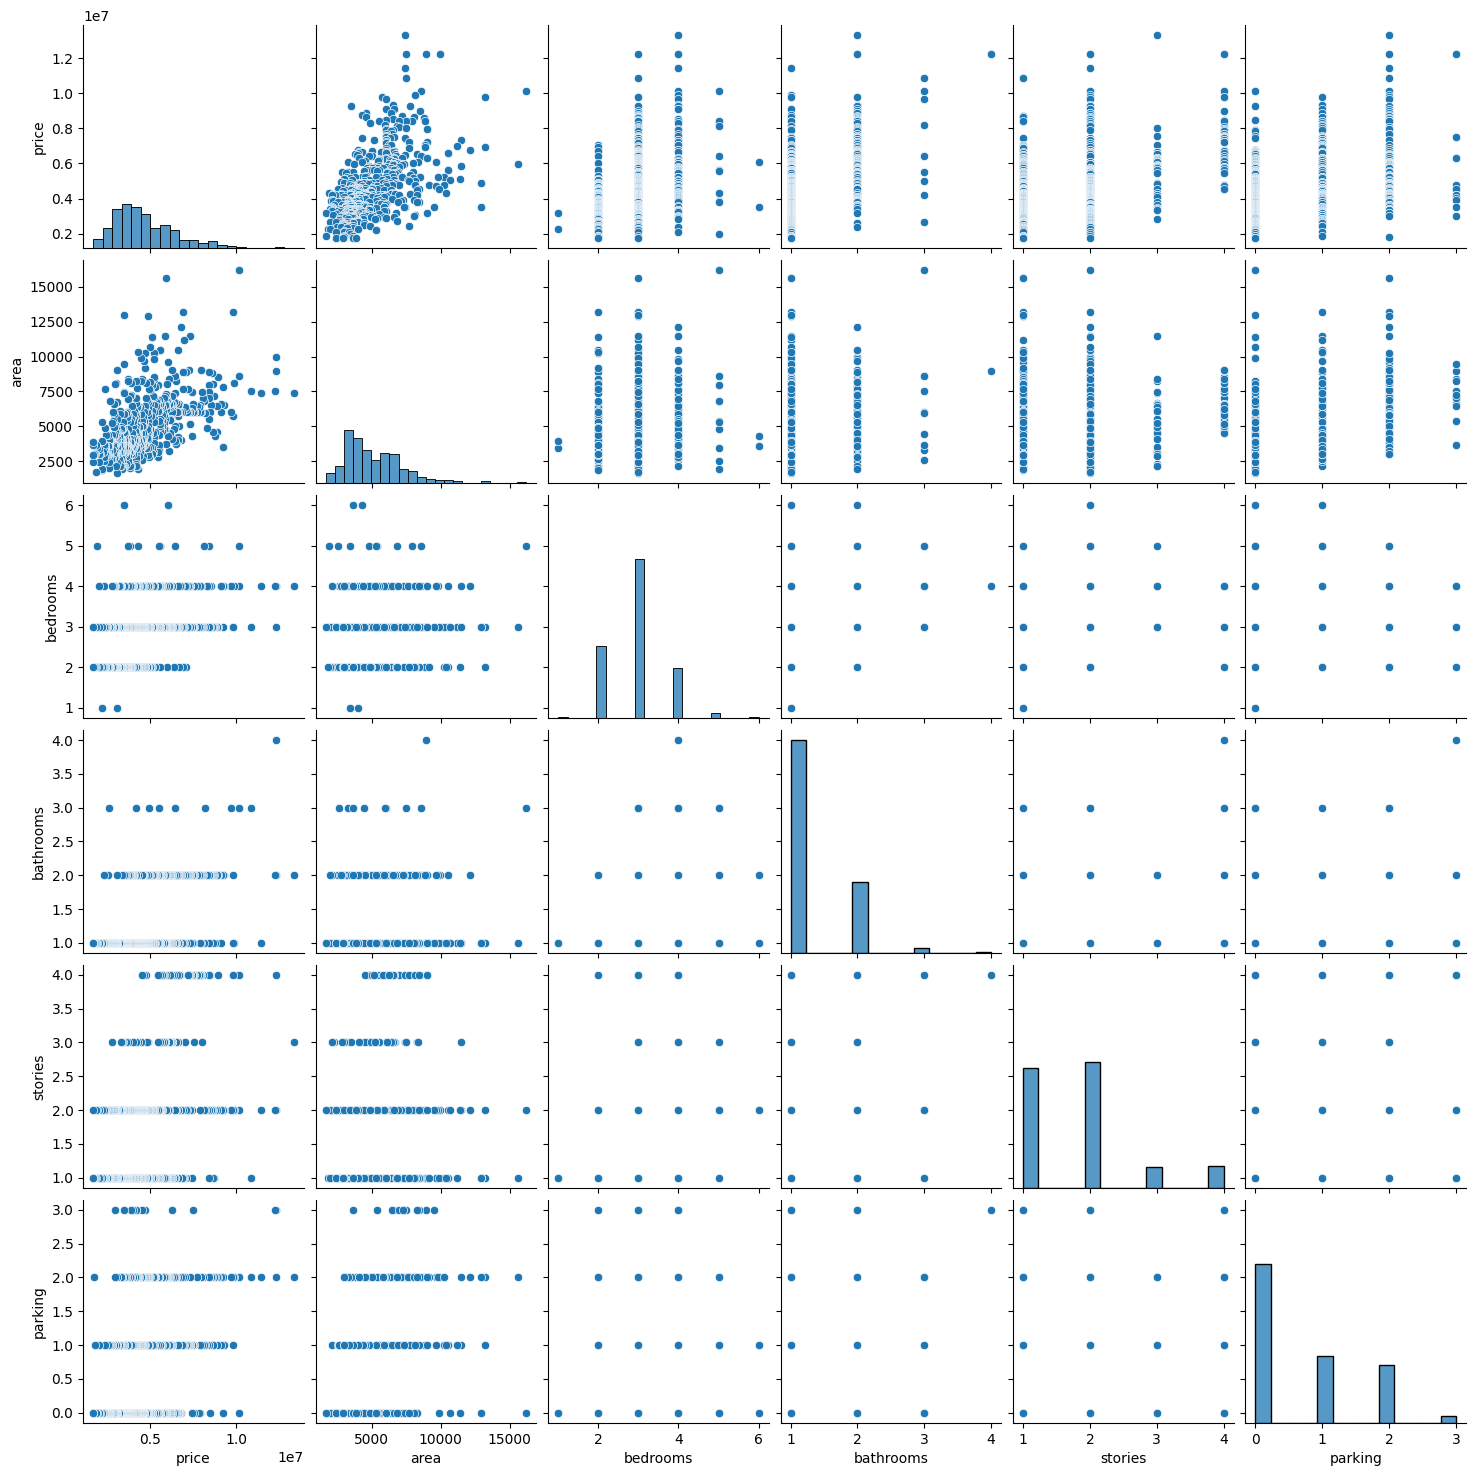

In [ ]:
sns.pairplot(df)

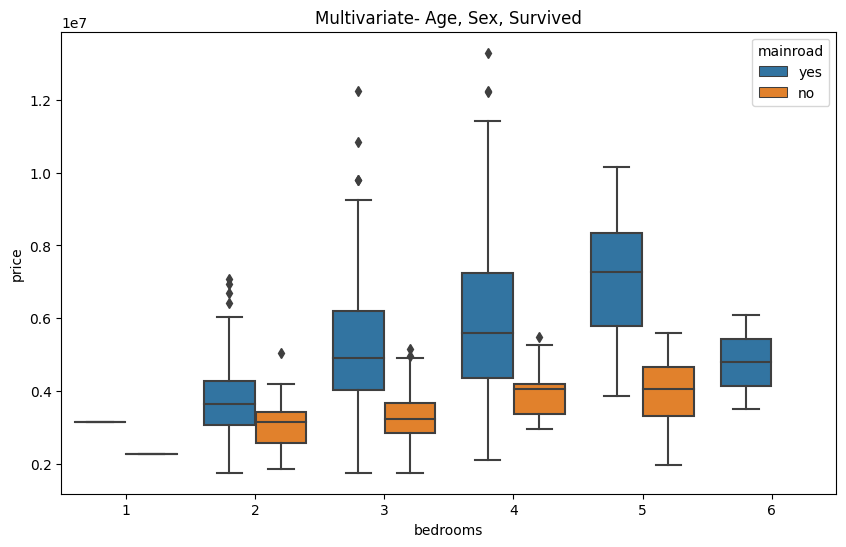

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bedrooms', y='price', hue='mainroad')
plt.title('Multivariate- Age, Sex, Survived')
plt.show()

4.

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


5. We can see there are no missing values

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

6. Replacing the area and price columns' outliers with respective medians, and also finding out the count

In [ ]:
Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lb_area = Q1_area - 1.5 * IQR_area
ub_area = Q3_area + 1.5 * IQR_area

lb_price = Q1_price - 1.5 * IQR_price
ub_price = Q3_price + 1.5 * IQR_price

outliers_area = df[(df['area'] < lb_area) | (df['area'] > ub_area)]
print("Number of outliers in Area: ", outliers_area.shape[0])
outliers_price = df[(df['price'] < lb_price) | (df['price'] > ub_price)]
print("Number of outliers in Price: ", outliers_price.shape[0])

df.loc[df['area'] < lb_area, 'area'] = df['area'].median()
df.loc[df['area'] > ub_area, 'area'] = df['area'].median()
df.loc[df['price'] < lb_price, 'price'] = df['price'].median()
df.loc[df['price'] > ub_price, 'price'] = df['price'].median()


Number of outliers in Area:  12
Number of outliers in Price:  15


7.

In [ ]:
df._get_numeric_data().columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4340000,7420,4,2,3,1,0,0,0,1,2,0
1,4340000,8960,4,4,4,1,0,0,0,1,3,0
2,4340000,9960,3,2,2,1,0,1,0,0,2,1
3,4340000,7500,4,2,2,1,0,1,0,1,3,0
4,4340000,7420,4,1,2,1,1,1,0,1,2,0


8.

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,0
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,0
4,7420,4,1,2,1,1,1,0,1,2,0


In [ ]:
y.head()

0    4340000
1    4340000
2    4340000
3    4340000
4    4340000
Name: price, dtype: int64

9.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X= scaler.fit_transform(X)

display(X)

array([[ 1.33470625,  1.40341936,  1.42181174, ...,  1.4726183 ,
         1.51769249, -1.40628573],
       [ 2.17446697,  1.40341936,  5.40580863, ...,  1.4726183 ,
         2.67940935, -1.40628573],
       [ 2.71976613,  0.04727831,  1.42181174, ..., -0.67906259,
         1.51769249, -0.09166185],
       ...,
       [-0.73743057, -1.30886273, -0.57018671, ..., -0.67906259,
        -0.80574124,  1.22296203],
       [-1.12459298,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.80574124, -1.40628573],
       [-0.61201177,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.80574124,  1.22296203]])

10.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

11.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

12.

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

13.

In [ ]:
y_pred = model.predict(X_test)

14.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

R2 Score:  0.6283929187132253
